In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.stats.multitest


In [2]:
data = pd.read_csv('/storage/cynthiawu/trans_eQTL/Scripts/yeast/eQTL_BYxRM/reference/Saccharomyces_cerevisiae.R64-1-1.81.gff3', skiprows=7, sep='\t', names=['chr', 'source', 'feature', 'start', 'end', 'score', 'strand', 'frame', 'attribute'])

In [6]:
data

,chr,source,feature,start,end,score,strand,frame,attribute
0,chrIV,ensembl,gene,1802,2953.0,.,+,.,ID=gene:YDL248W;Name=COS7;biotype=protein_codi...
1,chrIV,ensembl,gene,3762,3836.0,.,+,.,ID=gene:YDL247W-A;biotype=protein_coding;descr...
2,chrIV,ensembl,gene,5985,7814.0,.,+,.,ID=gene:YDL247W;Name=MPH2;biotype=protein_codi...
3,chrIV,ensembl,gene,8683,9756.0,.,-,.,ID=gene:YDL246C;Name=SOR2;biotype=protein_codi...
4,chrIV,ensembl,gene,11657,13360.0,.,-,.,ID=gene:YDL245C;Name=HXT15;biotype=protein_cod...
...,...,...,...,...,...,...,...,...,...
28866,chrM,ensembl,CDS,74495,75622.0,.,+,0,ID=CDS:Q0255;Parent=transcript:Q0255;protein_i...
28867,chrM,ensembl,CDS,75663,75872.0,.,+,0,ID=CDS:Q0255;Parent=transcript:Q0255;protein_i...
28868,chrM,ensembl,CDS,75904,75984.0,.,+,0,ID=CDS:Q0255;Parent=transcript:Q0255;protein_i...
28869,chrM,ensembl,CDS,79213,80022.0,.,+,0,ID=CDS:Q0275;Parent=transcript:Q0275;protein_i...


In [3]:
gene_info = {}
for index, row in data.iterrows():
    if row['feature'] in ['gene', 'pseudogene']:
        gene = (row['attribute'].split(';')[0].split(':')[1])
        gene_info[gene] = [row['chr'], row['start'], row['end']]

In [42]:
pvalues = pd.read_csv('/storage/cynthiawu/trans_eQTL/Scripts/yeast/Simulation_0/yeast_pvals.csv', sep='\t', index_col=0)

In [31]:
zscores

,YAL062W,YAL061W,YAL060W,YAL059W,YAL058W,YAL056W,YAL055W,YAL054C,YAL053W,YAL051W,...,YPR194C,YPR196W,YPR198W,YPR199C,YPR200C,YPR202W,YPR203W,YPR204W,Q0130,Q0140
chrI:33040_A/G,-31.598579,-0.972379,18.969061,0.979111,-1.186941,-31.004637,-8.123816,-11.391039,-2.453455,-0.647279,...,2.148648,-0.195722,-0.016357,1.399266,-0.344609,-0.526027,-0.255646,-0.810013,-0.530052,1.000394
chrI:33293_A/T,-31.622916,-0.984084,19.317666,1.125721,-1.007720,-31.539507,-8.360404,-11.599305,-2.693453,-0.744684,...,2.224936,-0.501589,-0.153324,1.289595,-0.386804,-0.740686,-0.427971,-0.860122,-0.651815,1.042772
chrI:34170_T/A,-31.511386,-0.885873,19.380271,1.078838,-1.051350,-31.673859,-8.351817,-11.548686,-2.676125,-0.751790,...,2.192915,-0.476664,-0.101812,1.326720,-0.308631,-0.757939,-0.443332,-0.869619,-0.648872,0.945447
chrI:34308_C/T,-31.217146,-0.853426,19.762337,1.199822,-1.004158,-32.243206,-8.612855,-11.525665,-2.668514,-0.700326,...,1.969360,-0.306733,-0.031491,1.394985,-0.229060,-0.685074,-0.543311,-0.764805,-0.966962,0.955611
chrI:34554_A/G,-30.970802,-0.775722,20.208265,1.082412,-0.859863,-32.553584,-8.697921,-11.592931,-2.473533,-0.646193,...,2.107095,-0.390783,0.242107,1.661360,-0.179508,-0.678642,-0.497393,-0.766558,-0.992528,0.757448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chrXVI:925172_C/G,-1.878288,1.656646,1.765346,0.078942,0.514008,0.155787,-0.136514,1.802870,-0.454363,0.310212,...,20.650455,-5.819924,1.783867,-1.959426,-18.699526,-17.405282,-17.440643,-20.267768,1.790716,-0.652096
chrXVI:925497_A/C,-1.789710,1.689125,1.781295,0.019399,0.510535,0.099865,-0.097645,1.795782,-0.433946,0.282035,...,20.677838,-5.790738,1.738267,-2.021244,-18.692003,-17.397571,-17.531723,-20.341962,1.861398,-0.668779
chrXVI:925746_T/A,-1.876742,1.517999,1.835628,-0.022717,0.477998,0.044040,-0.169780,1.634112,-0.490999,0.251663,...,20.716429,-5.802717,1.826944,-2.008670,-18.728739,-17.396632,-17.484141,-20.439892,1.802389,-0.671755
chrXVI:927980_A/G,-1.756390,1.613718,1.929130,-0.150859,0.597739,0.275670,-0.007228,1.832706,-0.366203,0.554485,...,21.052546,-5.561080,1.699271,-2.306076,-19.316015,-17.630722,-17.972464,-21.250677,1.857161,-0.746218


In [43]:
col_coord = [f'{gene_info[col][0]}:{gene_info[col][1]}' for col in pvalues.columns]
pvalues.columns = col_coord
# remove chrM
pvalues = pvalues[pvalues.columns[:-2]]

In [19]:
zscores

,chrI:31567,chrI:33448,chrI:35155,chrI:36509,chrI:37464,chrI:39259,chrI:42177,chrI:42881,chrI:45899,chrI:48564,...,chrXVI:921860,chrXVI:922909,chrXVI:924304,chrXVI:931376,chrXVI:934034,chrXVI:938148,chrXVI:939279,chrXVI:943032,chrXVI:943880,chrXVI:944603
chrI:33040_A/G,-31.598579,-0.972379,18.969061,0.979111,-1.186941,-31.004637,-8.123816,-11.391039,-2.453455,-0.647279,...,-0.055831,-1.137253,2.148648,-0.195722,-0.016357,1.399266,-0.344609,-0.526027,-0.255646,-0.810013
chrI:33293_A/T,-31.622916,-0.984084,19.317666,1.125721,-1.007720,-31.539507,-8.360404,-11.599305,-2.693453,-0.744684,...,-0.106657,-1.307330,2.224936,-0.501589,-0.153324,1.289595,-0.386804,-0.740686,-0.427971,-0.860122
chrI:34170_T/A,-31.511386,-0.885873,19.380271,1.078838,-1.051350,-31.673859,-8.351817,-11.548686,-2.676125,-0.751790,...,-0.090035,-1.276223,2.192915,-0.476664,-0.101812,1.326720,-0.308631,-0.757939,-0.443332,-0.869619
chrI:34308_C/T,-31.217146,-0.853426,19.762337,1.199822,-1.004158,-32.243206,-8.612855,-11.525665,-2.668514,-0.700326,...,-0.047494,-1.262350,1.969360,-0.306733,-0.031491,1.394985,-0.229060,-0.685074,-0.543311,-0.764805
chrI:34554_A/G,-30.970802,-0.775722,20.208265,1.082412,-0.859863,-32.553584,-8.697921,-11.592931,-2.473533,-0.646193,...,-0.067610,-1.269184,2.107095,-0.390783,0.242107,1.661360,-0.179508,-0.678642,-0.497393,-0.766558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chrXVI:925172_C/G,-1.878288,1.656646,1.765346,0.078942,0.514008,0.155787,-0.136514,1.802870,-0.454363,0.310212,...,27.745135,21.698403,20.650455,-5.819924,1.783867,-1.959426,-18.699526,-17.405282,-17.440643,-20.267768
chrXVI:925497_A/C,-1.789710,1.689125,1.781295,0.019399,0.510535,0.099865,-0.097645,1.795782,-0.433946,0.282035,...,27.757131,21.677167,20.677838,-5.790738,1.738267,-2.021244,-18.692003,-17.397571,-17.531723,-20.341962
chrXVI:925746_T/A,-1.876742,1.517999,1.835628,-0.022717,0.477998,0.044040,-0.169780,1.634112,-0.490999,0.251663,...,27.498510,21.437862,20.716429,-5.802717,1.826944,-2.008670,-18.728739,-17.396632,-17.484141,-20.439892
chrXVI:927980_A/G,-1.756390,1.613718,1.929130,-0.150859,0.597739,0.275670,-0.007228,1.832706,-0.366203,0.554485,...,26.340928,20.952275,21.052546,-5.561080,1.699271,-2.306076,-19.316015,-17.630722,-17.972464,-21.250677


In [101]:
zscores = ''

In [7]:
# find max length of chr based on furthest snp (approx)
chr_len = {}
for snp in pvalues.index:
    snp_coord = snp.split(':')
    cur_len = int(snp_coord[1].split('_')[0])
    if snp_coord[0] in chr_len:
        chr_len[snp_coord[0]] = max(chr_len[snp_coord[0]], cur_len)
    else:
        chr_len[snp_coord[0]] = cur_len
        
# have 100 bp buffer between chr
for key in chr_len:
    chr_len[key] += 100

#chr starting position if all chr positions are merged (flattened)
chr_start = {}
index = 0
for key in chr_len:
    chr_start[key] = index
    index += chr_len[key]

In [86]:
chr_start

{'chrI': 0,
 'chrII': 202925,
 'chrIII': 1001807,
 'chrIV': 1304886,
 'chrV': 2826355,
 'chrVI': 3390284,
 'chrVII': 3656529,
 'chrVIII': 4724890,
 'chrIX': 5244209,
 'chrX': 5669175,
 'chrXI': 6393531,
 'chrXII': 7037293,
 'chrXIII': 8096000,
 'chrXIV': 9010675,
 'chrXV': 9776105,
 'chrXVI': 10843725}

In [64]:
labels_pos = []
labels = []
for key, value in chr_start.items():
    labels_pos.append(value+5000)
    labels.append(key)

In [65]:
labels

['chrI',
 'chrII',
 'chrIII',
 'chrIV',
 'chrV',
 'chrVI',
 'chrVII',
 'chrVIII',
 'chrIX',
 'chrX',
 'chrXI',
 'chrXII',
 'chrXIII',
 'chrXIV',
 'chrXV',
 'chrXVI']

In [66]:
labels_pos

[5000,
 207925,
 1006807,
 1309886,
 2831355,
 3395284,
 3661529,
 4729890,
 5249209,
 5674175,
 6398531,
 7042293,
 8101000,
 9015675,
 9781105,
 10848725]

/storage/cynthiawu/miniconda3/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log


Text(0, 0.5, 'gene position (chromosome)')

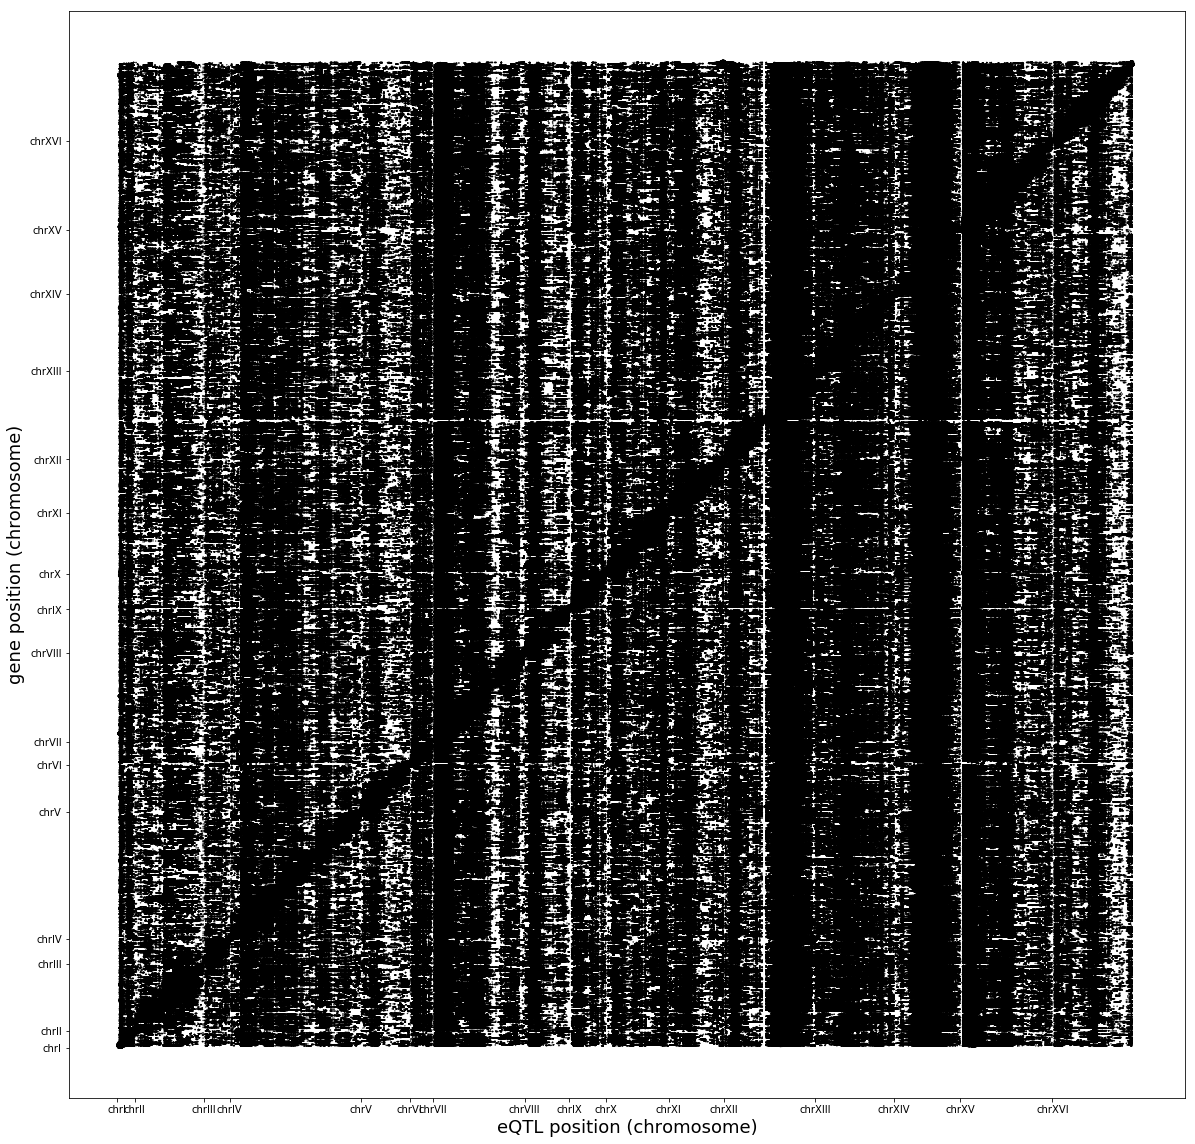

In [77]:
# plt.figure(figsize=(12, 12))
fig, ax = plt.subplots(figsize=(20, 20))
# index = 0
for snp, genes in pvalues.iterrows():
#     print(snp)
    snp_chr = snp.split(':')
    snp_pos = int(snp_chr[1].split('_')[0])
    x_pos = [chr_start[snp_chr[0]] + snp_pos]*len(genes)
    y_pos = []
    size = []
    for gene, pvalue in genes.items():
        gene_chr = gene.split(':')
        gene_len = int(gene_chr[1])
        y_pos.append(chr_start[gene_chr[0]] + gene_len)
#         size.append(0)
        if pvalue < 0.05:
            size.append(0.05*-np.log(pvalue))
        else:
            size.append(0)
    plt.scatter(x_pos, y_pos, s=size, color='black')

#     index += 1
#     if index == 10:
#         break
# plt.show()
ax.set_xticks(labels_pos)
ax.set_xticklabels(labels)
ax.set_yticks(labels_pos)
ax.set_yticklabels(labels)
plt.xlabel('eQTL position (chromosome)', fontsize=18)
plt.ylabel('gene position (chromosome)', fontsize=18)

In [83]:
pval_flat = np.array(pvalues).flatten()

In [84]:
pval_flat

array([3.86175288e-219, 3.30862151e-001, 3.07346955e-080, ...,
       7.64396900e-070, 1.69836404e-073, 3.44901903e-101])

In [87]:
pvals_adj = statsmodels.stats.multitest.multipletests(pval_flat, alpha=0.05, method='fdr_bh')


In [89]:
sum(pvals_adj[0])

KeyboardInterrupt: 

In [90]:
pvals_adj[1]

array([5.46763752e-215, 6.71487334e-001, 5.75084620e-077, ...,
       1.13516611e-066, 2.74922935e-070, 9.73106524e-098])

In [91]:
pvalues.shape

(11530, 5726)

In [92]:
pvalues_adjusted = pvals_adj[1].reshape((11530, 5726))

In [97]:
pvalues_adj_df = pd.DataFrame(pvalues_adjusted, columns=pvalues.columns, index=pvalues.index)

In [98]:
pvalues_adj_df

,chrI:31567,chrI:33448,chrI:35155,chrI:36509,chrI:37464,chrI:39259,chrI:42177,chrI:42881,chrI:45899,chrI:48564,...,chrXVI:921860,chrXVI:922909,chrXVI:924304,chrXVI:931376,chrXVI:934034,chrXVI:938148,chrXVI:939279,chrXVI:943032,chrXVI:943880,chrXVI:944603
chrI:33040_A/G,5.467638e-215,0.671487,5.750846e-77,0.668617,0.578518,6.112411e-207,6.931062e-14,1.820263e-27,0.117680,0.802500,...,9.869895e-01,6.002873e-01,1.974096e-01,9.508726e-01,0.996269,0.485295,9.070006e-01,8.466472e-01,9.338694e-01,7.389092e-01
chrI:33293_A/T,2.537392e-215,0.666517,7.578434e-80,0.605333,0.656431,3.500647e-214,1.035916e-14,1.717765e-28,0.072813,0.764986,...,9.744377e-01,5.256006e-01,1.750685e-01,8.551876e-01,0.962344,0.533402,8.936173e-01,7.665621e-01,8.801587e-01,7.184800e-01
chrI:34170_T/A,8.473912e-214,0.707851,2.274534e-80,0.625775,0.637652,5.090715e-216,1.110933e-14,3.061334e-28,0.075550,0.762176,...,9.786149e-01,5.392780e-01,1.842382e-01,8.637579e-01,0.975659,0.517088,9.180812e-01,7.597520e-01,8.750236e-01,7.145754e-01
chrI:34308_C/T,8.386618e-210,0.721223,1.348731e-83,0.572856,0.657956,6.819238e-224,1.279049e-15,3.977457e-28,0.076776,0.782267,...,9.889837e-01,5.453788e-01,2.559300e-01,9.186560e-01,0.992765,0.487168,9.415196e-01,7.881383e-01,8.405514e-01,7.570129e-01
chrI:34554_A/G,1.738702e-206,0.752672,1.924675e-87,0.624216,0.718585,3.045326e-228,6.232491e-16,1.847649e-28,0.113328,0.802912,...,9.841288e-01,5.423788e-01,2.102160e-01,8.923312e-01,0.937783,0.373645,9.553220e-01,7.906151e-01,8.566284e-01,7.563181e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chrXVI:925172_C/G,2.886628e-01,0.375588,3.318140e-01,0.981359,0.850856,9.616929e-01,9.667749e-01,3.171714e-01,0.871328,0.917603,...,1.643446e-165,6.371500e-101,2.426194e-91,3.827822e-07,0.324557,0.259404,8.926504e-75,1.064800e-64,5.779622e-65,5.812034e-88
chrXVI:925497_A/C,3.222767e-01,0.362314,3.255596e-01,0.995572,0.852065,9.761515e-01,9.767135e-01,3.199167e-01,0.878160,0.926081,...,1.180245e-165,1.007006e-100,1.382574e-91,4.500527e-07,0.342530,0.238164,1.026782e-74,1.216466e-64,1.189166e-65,1.300156e-88
chrXVI:925746_T/A,2.892334e-01,0.433962,3.046374e-01,0.994807,0.863301,9.898093e-01,9.579484e-01,3.849011e-01,0.858852,0.935028,...,1.450074e-162,1.698671e-98,6.247188e-92,4.212158e-07,0.307941,0.242410,5.182616e-75,1.236442e-64,2.720540e-65,1.787357e-89
chrXVI:927980_A/G,3.353405e-01,0.393388,2.701540e-01,0.962999,0.820913,9.279737e-01,9.983606e-01,3.057510e-01,0.900199,0.836567,...,4.277428e-149,4.716523e-94,5.803824e-95,1.557810e-06,0.358199,0.153029,7.822474e-80,2.112443e-66,5.029413e-69,9.001761e-97


/storage/cynthiawu/miniconda3/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log


Text(0, 0.5, 'gene position (chromosome)')

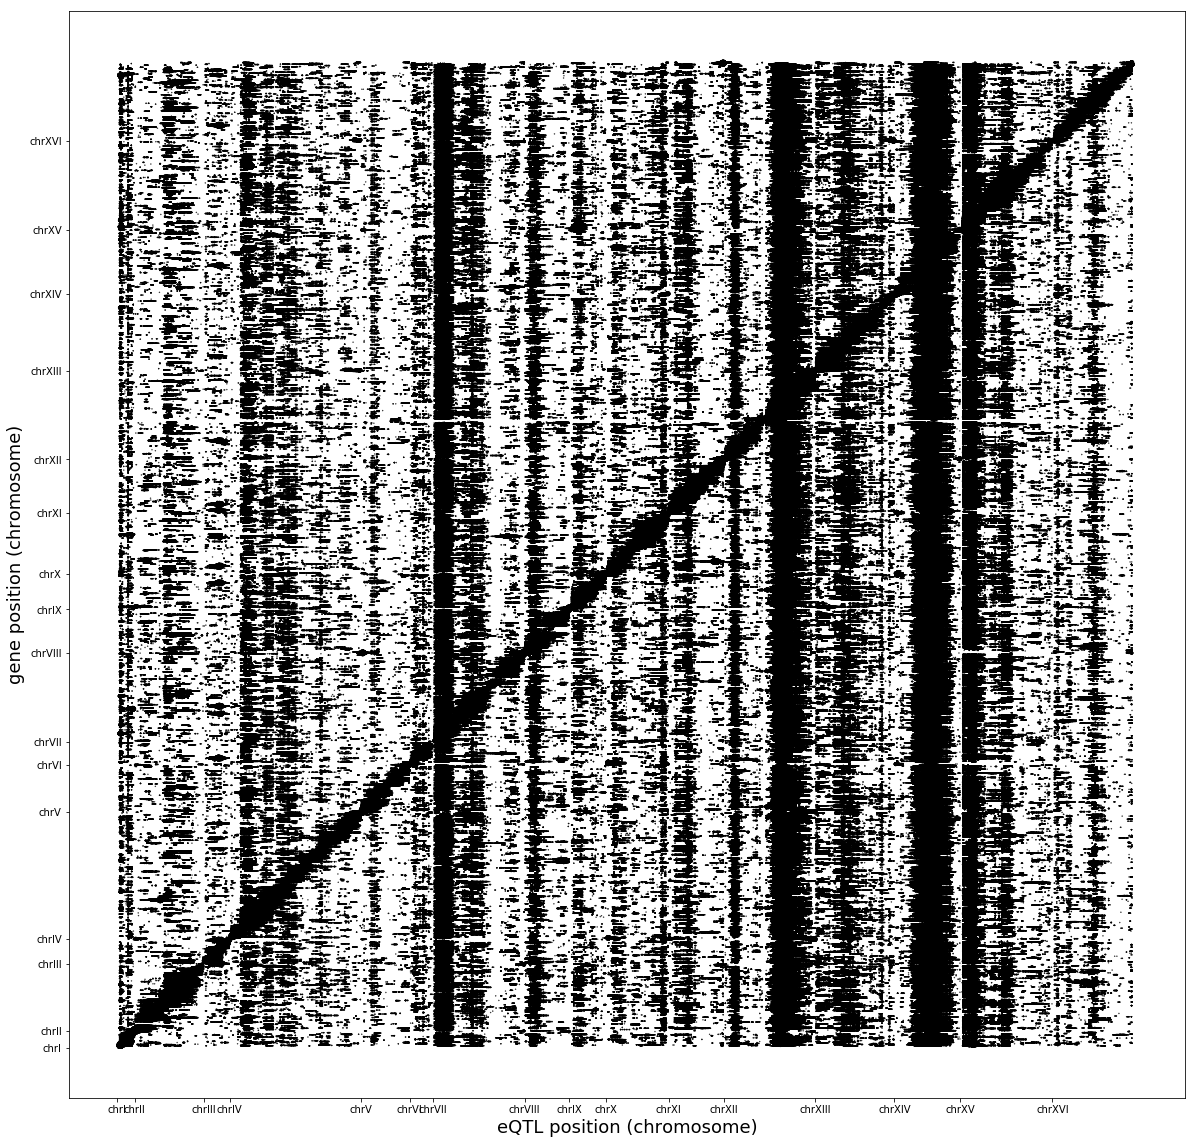

In [99]:
# plt.figure(figsize=(12, 12))
fig, ax = plt.subplots(figsize=(20, 20))
# index = 0
for snp, genes in pvalues_adj_df.iterrows():
#     print(snp)
    snp_chr = snp.split(':')
    snp_pos = int(snp_chr[1].split('_')[0])
    x_pos = [chr_start[snp_chr[0]] + snp_pos]*len(genes)
    y_pos = []
    size = []
    for gene, pvalue in genes.items():
        gene_chr = gene.split(':')
        gene_len = int(gene_chr[1])
        y_pos.append(chr_start[gene_chr[0]] + gene_len)
#         size.append(0)
        if pvalue < 0.05:
            size.append(0.05*-np.log(pvalue))
        else:
            size.append(0)
    plt.scatter(x_pos, y_pos, s=size, color='black')

#     index += 1
#     if index == 10:
#         break
# plt.show()
ax.set_xticks(labels_pos)
ax.set_xticklabels(labels)
ax.set_yticks(labels_pos)
ax.set_yticklabels(labels)
plt.xlabel('eQTL position (chromosome)', fontsize=18)
plt.ylabel('gene position (chromosome)', fontsize=18)

In [4]:
cpma_values = pd.read_csv('/storage/cynthiawu/trans_eQTL/Scripts/yeast/CPMA/gene-snp-eqtl_empiricalpvalues_topx_1.0_converted', sep='\t', index_col=0)

In [5]:
cpma_values

,cpma,pvalue
snp,,
chrI:33040_A/G,6666.008189,0.504471
chrI:33293_A/T,7200.449497,0.466867
chrI:34170_T/A,7248.263573,0.463699
chrI:34308_C/T,7114.982168,0.472575
chrI:34554_A/G,7236.627468,0.464457
...,...,...
chrXVI:925172_C/G,2594.383821,0.867016
chrXVI:925497_A/C,2656.455645,0.861412
chrXVI:925746_T/A,2490.770686,0.876004


In [6]:
# find max length of chr based on furthest snp (approx)
chr_len = {}
for snp in cpma_values.index:
    snp_coord = snp.split(':')
    cur_len = int(snp_coord[1].split('_')[0])
    if snp_coord[0] in chr_len:
        chr_len[snp_coord[0]] = max(chr_len[snp_coord[0]], cur_len)
    else:
        chr_len[snp_coord[0]] = cur_len
        
# have 100 bp buffer between chr
for key in chr_len:
    chr_len[key] += 100

#chr starting position if all chr positions are merged (flattened)
chr_start = {}
index = 0
for key in chr_len:
    chr_start[key] = index
    index += chr_len[key]

In [19]:
for snp, row in cpma_values.iterrows():
    print(snp, col[1])
    break

chrI:33040_A/G 0.5044709910580178


In [20]:
x_pos = []
y_pos = []
for snp, row in cpma_values.iterrows():
#     print(snp)
    snp_chr = snp.split(':')
    snp_pos = int(snp_chr[1].split('_')[0])
    x_pos.append(chr_start[snp_chr[0]] + snp_pos)
    y_pos.append(-np.log(row[1]))

In [13]:
labels_pos = []
labels = []
for key, value in chr_start.items():
    labels_pos.append(value+5000)
    labels.append(key)

Text(0, 0.5, 'CPMA -log(pvalue)')

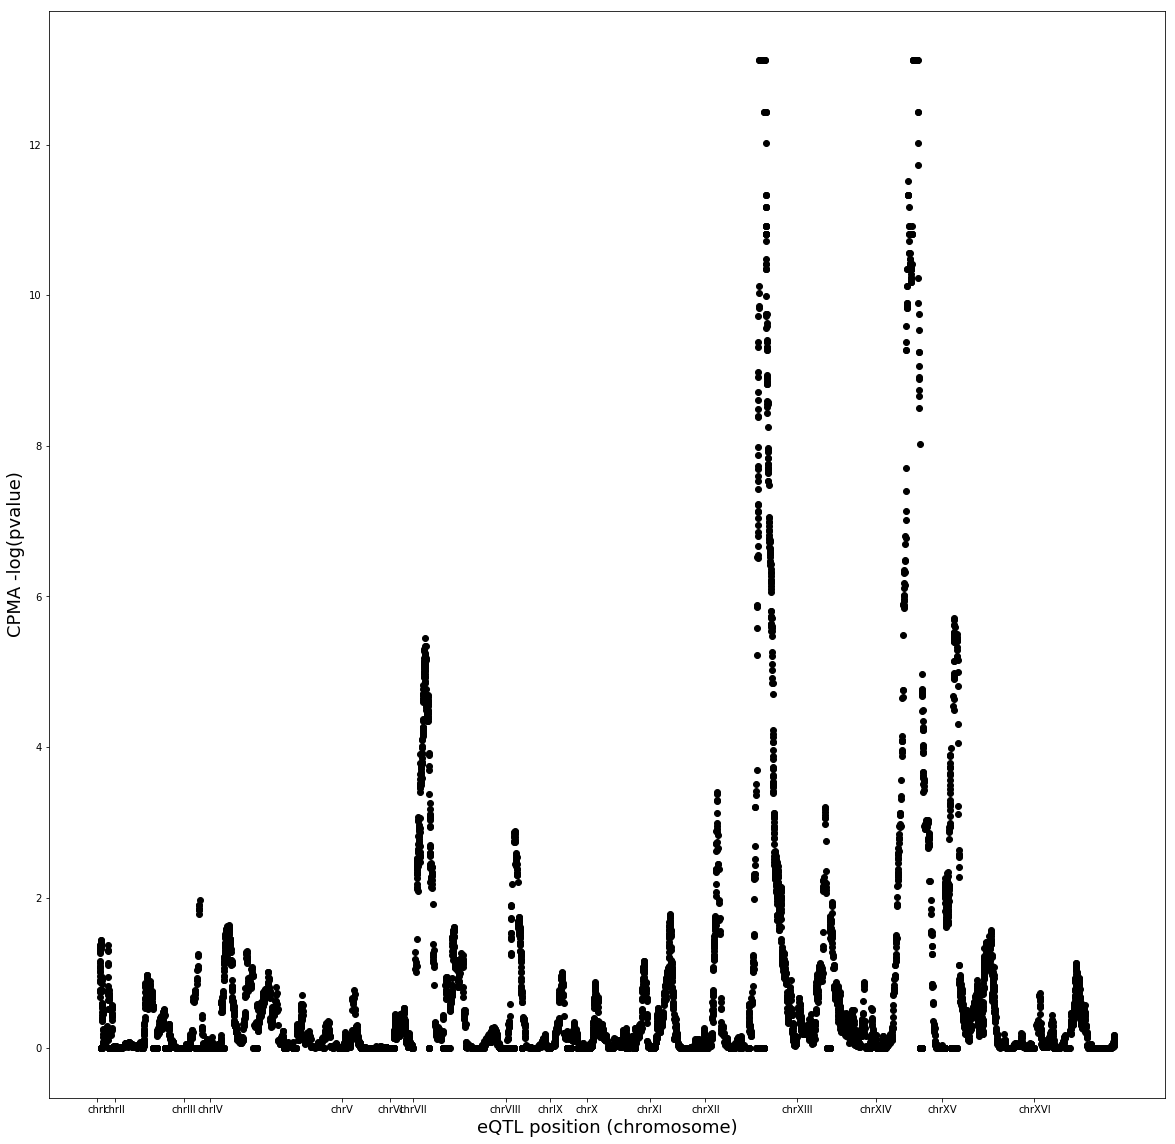

In [23]:
# plt.figure(figsize=(12, 12))
fig, ax = plt.subplots(figsize=(20, 20))

plt.scatter(x_pos, y_pos, color='black')

ax.set_xticks(labels_pos)
ax.set_xticklabels(labels)
# ax.set_yticks(labels_pos)
# ax.set_yticklabels(labels)
plt.xlabel('eQTL position (chromosome)', fontsize=18)
plt.ylabel('CPMA -log(pvalue)', fontsize=18)

In [41]:
cpma_mix = pd.read_csv('/storage/cynthiawu/trans_eQTL/Scripts/yeast/CPMA/gene-snp-eqtl_cpma-mix_converted', sep='\t', index_col=0)

In [42]:
cpma_mix

,mixture_tstat,predicted_T,predicted_L
snp,,,
chrI:33040_A/G,8696.032275,0.131609,10.289716
chrI:33293_A/T,9003.819036,0.174341,8.631776
chrI:34170_T/A,9047.458111,0.176693,8.579996
chrI:34308_C/T,9067.302560,0.154046,9.458265
chrI:34554_A/G,9270.203719,0.146524,9.943379
...,...,...,...
chrXVI:925172_C/G,3170.562611,0.200025,4.381071
chrXVI:925497_A/C,3197.552831,0.215592,4.217931
chrXVI:925746_T/A,3091.526570,0.166085,4.785445


In [44]:
for snp, row in cpma_mix.iterrows():
    print(snp, row[1])
    break

chrI:33040_A/G 0.13160884663863506


In [27]:
cpma_mix.loc[cpma_mix['snp'] == 'chrI:138499_G/A']


,snp,mixture_tstat,predicted_T,predicted_L
118,chrI:138499_G/A,NaN,0.5,1.0


In [49]:
cpma_mix_dropnan = cpma_mix.dropna(subset=['mixture_tstat'])

In [ ]:
mixture_tstat

Text(0, 0.5, 'Count')

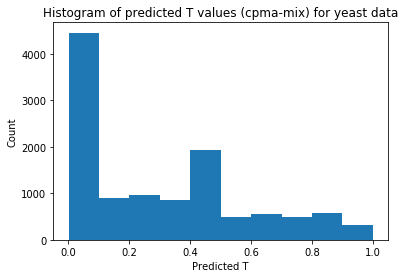

In [50]:
plt.hist(list(cpma_mix['predicted_T']))
plt.title('Histogram of predicted T values (cpma-mix) for yeast data')
plt.xlabel('Predicted T')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

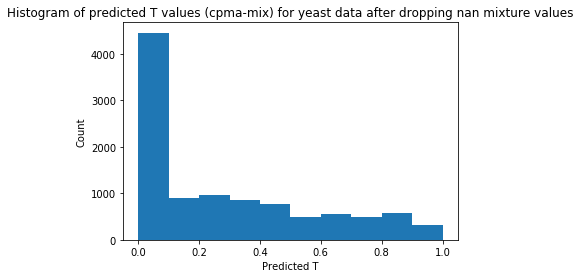

In [51]:
plt.hist(list(cpma_mix_dropnan['predicted_T']))
plt.title('Histogram of predicted T values (cpma-mix) for yeast data after dropping nan mixture values')
plt.xlabel('Predicted T')
plt.ylabel('Count')

In [52]:
x_pos = []
y_pos = []
for snp, row in cpma_mix_dropnan.iterrows():
#     print(snp)
    snp_chr = snp.split(':')
    snp_pos = int(snp_chr[1].split('_')[0])
    x_pos.append(chr_start[snp_chr[0]] + snp_pos)
    y_pos.append(row[1])

Text(0, 0.5, 'CPMA % target genes')

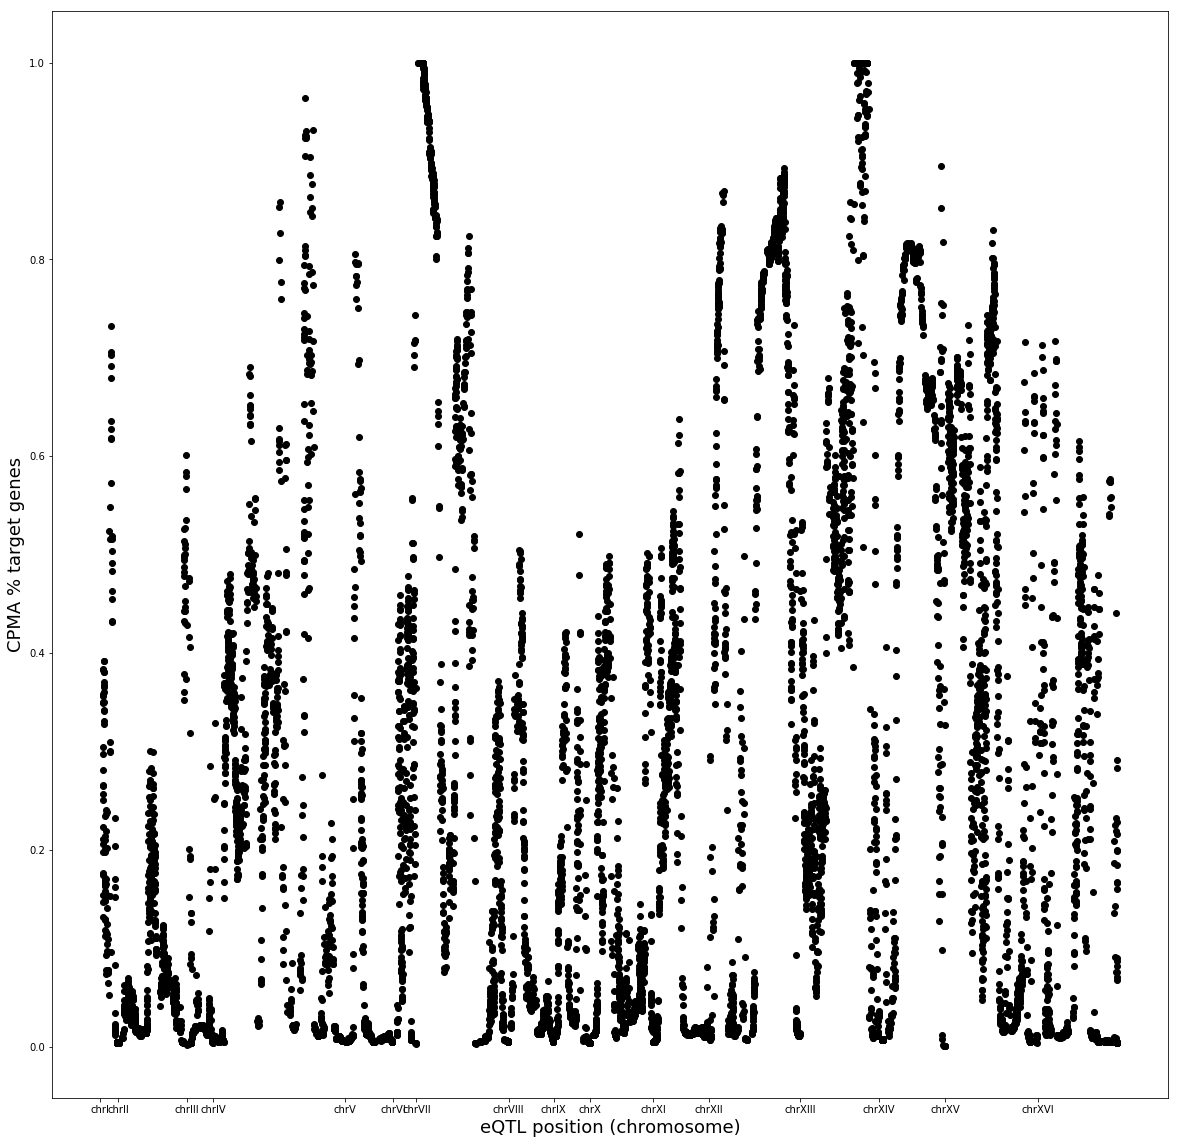

In [53]:
# plt.figure(figsize=(12, 12))
fig, ax = plt.subplots(figsize=(20, 20))

plt.scatter(x_pos, y_pos, color='black')

ax.set_xticks(labels_pos)
ax.set_xticklabels(labels)
# ax.set_yticks(labels_pos)
# ax.set_yticklabels(labels)
plt.xlabel('eQTL position (chromosome)', fontsize=18)
plt.ylabel('CPMA % target genes', fontsize=18)

In [61]:
yeast = pd.read_csv('/storage/cynthiawu/trans_eQTL/Scripts/yeast/covariates.csv', sep='\t', index_col=0).T

In [63]:
yeast.to_csv('/storage/cynthiawu/trans_eQTL/Scripts/yeast/covariates.csv', sep='\t')

In [62]:
yeast

,A01_01-A01-A1-BYxRM_eQTL_10-H6,A01_02-A01-A2-BYxRM_eQTL_11-F3,A01_03-A01-A3-BYxRM_eQTL_11-C6,A01_04-A01-A4-BYxRM_eQTL_03-G2,A01_05-A01-A5-BYxRM_eQTL_11-F10,A01_06-A01-A6-BYxRM_eQTL_12-H5,A01_07-A01-A7-BYxRM_eQTL_07-F3,A01_08-A01-A8-BYxRM_eQTL_05-C9,A01_09-A01-A9-BYxRM_eQTL_12-A6,A01_10-A01-A10-BYxRM_eQTL_06-C8,...,A11_86-A11-H2-BYxRM_eQTL_02-D11,A11_87-A11-H3-BYxRM_eQTL_12-A8,A11_88-A11-H4-BYxRM_eQTL_12-H10,A11_89-A11-H5-BYxRM_eQTL_08-F8,A11_91-A11-H7-BYxRM_eQTL_08-H9,A11_92-A11-H8-BYxRM_eQTL_13-F7,A11_93-A11-H9-BYxRM_eQTL_03-C3,A11_94-A11-H10-BYxRM_eQTL_10-B9,A11_95-A11-H11-BYxRM_eQTL_09-A2,A11_96-A11-H12-BYxRM_eQTL_13-C7
(Intercept),1.0,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.00,1.00,...,1.000,1.00,1.000,1.00,1.000,1.000,1.000,1.000,1.000,1.000
gbatch.factBYxRM_eQTL_02,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.00,...,1.000,0.00,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000
gbatch.factBYxRM_eQTL_03,0.0,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.00,0.00,...,0.000,0.00,0.000,0.00,0.000,0.000,1.000,0.000,0.000,0.000
gbatch.factBYxRM_eQTL_04,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.00,...,0.000,0.00,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000
gbatch.factBYxRM_eQTL_05,0.0,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.00,0.00,...,0.000,0.00,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000
gbatch.factBYxRM_eQTL_06,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,1.00,...,0.000,0.00,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000
gbatch.factBYxRM_eQTL_07,0.0,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.00,0.00,...,0.000,0.00,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000
gbatch.factBYxRM_eQTL_08,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.00,...,0.000,0.00,0.000,1.00,1.000,0.000,0.000,0.000,0.000,0.000
gbatch.factBYxRM_eQTL_09,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.00,...,0.000,0.00,0.000,0.00,0.000,0.000,0.000,0.000,1.000,0.000
gbatch.factBYxRM_eQTL_10,1.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.00,...,0.000,0.00,0.000,0.00,0.000,0.000,0.000,1.000,0.000,0.000


In [64]:
beta = np.loadtxt('/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/null/numTarget_10000/Beta_01/beta.txt')

In [70]:
for row in beta:
    print(row)
    np.random.shuffle(row)
    print(row)
    

[0.1 0.1 0.1 ... 0.  0.1 0.1]
[0.  0.1 0.1 ... 0.1 0.1 0. ]
[0.1 0.1 0.1 ... 0.  0.  0. ]
[0. 0. 0. ... 0. 0. 0.]
[0.1 0.1 0.1 ... 0.  0.  0. ]
[0. 0. 0. ... 0. 0. 0.]
[0.1 0.1 0.1 ... 0.  0.  0. ]
[0. 0. 0. ... 0. 0. 0.]


In [79]:
np.savetxt(X=beta, fname='/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/null/numTarget_10000/Beta_01/beta.txt')

In [78]:
?np.savetxt

In [96]:
pvalues.columns

Index(['chrI:31567', 'chrI:33448', 'chrI:35155', 'chrI:36509', 'chrI:37464',
       'chrI:39259', 'chrI:42177', 'chrI:42881', 'chrI:45899', 'chrI:48564',
       ...
       'chrXVI:921860', 'chrXVI:922909', 'chrXVI:924304', 'chrXVI:931376',
       'chrXVI:934034', 'chrXVI:938148', 'chrXVI:939279', 'chrXVI:943032',
       'chrXVI:943880', 'chrXVI:944603'],
      dtype='object', length=5726)

In [50]:
size[0]*4

21.749812339331736

In [39]:
snp = 'chrI:33040_A/G'
snp_chr = snp.split(':')
snp_pos = int(snp_chr[1].split('_')[0])
x_pos = [chr_start[snp_chr[0]] + snp_pos]*len(genes)


In [38]:
snp_chr

['chrI', '33040_A/G']

In [35]:
int(snp_coord[1].split('_')[0])

928107

In [36]:
snp_coord[1]

'928107_C/T'

In [40]:
snp_pos

33040

In [30]:
x_pos

[928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 928107,
 

In [10]:
zscores

,chrI:31567,chrI:33448,chrI:35155,chrI:36509,chrI:37464,chrI:39259,chrI:42177,chrI:42881,chrI:45899,chrI:48564,...,chrXVI:924304,chrXVI:931376,chrXVI:934034,chrXVI:938148,chrXVI:939279,chrXVI:943032,chrXVI:943880,chrXVI:944603,chrM:46723,chrM:48901
chrI:33040_A/G,-31.598579,-0.972379,18.969061,0.979111,-1.186941,-31.004637,-8.123816,-11.391039,-2.453455,-0.647279,...,2.148648,-0.195722,-0.016357,1.399266,-0.344609,-0.526027,-0.255646,-0.810013,-0.530052,1.000394
chrI:33293_A/T,-31.622916,-0.984084,19.317666,1.125721,-1.007720,-31.539507,-8.360404,-11.599305,-2.693453,-0.744684,...,2.224936,-0.501589,-0.153324,1.289595,-0.386804,-0.740686,-0.427971,-0.860122,-0.651815,1.042772
chrI:34170_T/A,-31.511386,-0.885873,19.380271,1.078838,-1.051350,-31.673859,-8.351817,-11.548686,-2.676125,-0.751790,...,2.192915,-0.476664,-0.101812,1.326720,-0.308631,-0.757939,-0.443332,-0.869619,-0.648872,0.945447
chrI:34308_C/T,-31.217146,-0.853426,19.762337,1.199822,-1.004158,-32.243206,-8.612855,-11.525665,-2.668514,-0.700326,...,1.969360,-0.306733,-0.031491,1.394985,-0.229060,-0.685074,-0.543311,-0.764805,-0.966962,0.955611
chrI:34554_A/G,-30.970802,-0.775722,20.208265,1.082412,-0.859863,-32.553584,-8.697921,-11.592931,-2.473533,-0.646193,...,2.107095,-0.390783,0.242107,1.661360,-0.179508,-0.678642,-0.497393,-0.766558,-0.992528,0.757448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chrXVI:925172_C/G,-1.878288,1.656646,1.765346,0.078942,0.514008,0.155787,-0.136514,1.802870,-0.454363,0.310212,...,20.650455,-5.819924,1.783867,-1.959426,-18.699526,-17.405282,-17.440643,-20.267768,1.790716,-0.652096
chrXVI:925497_A/C,-1.789710,1.689125,1.781295,0.019399,0.510535,0.099865,-0.097645,1.795782,-0.433946,0.282035,...,20.677838,-5.790738,1.738267,-2.021244,-18.692003,-17.397571,-17.531723,-20.341962,1.861398,-0.668779
chrXVI:925746_T/A,-1.876742,1.517999,1.835628,-0.022717,0.477998,0.044040,-0.169780,1.634112,-0.490999,0.251663,...,20.716429,-5.802717,1.826944,-2.008670,-18.728739,-17.396632,-17.484141,-20.439892,1.802389,-0.671755
chrXVI:927980_A/G,-1.756390,1.613718,1.929130,-0.150859,0.597739,0.275670,-0.007228,1.832706,-0.366203,0.554485,...,21.052546,-5.561080,1.699271,-2.306076,-19.316015,-17.630722,-17.972464,-21.250677,1.857161,-0.746218


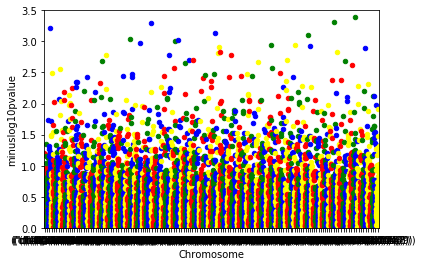

In [52]:
from pandas import DataFrame
from scipy.stats import uniform
from scipy.stats import randint
import numpy as np
import matplotlib.pyplot as plt

# some sample data
df = DataFrame({'gene' : ['gene-%i' % i for i in np.arange(10000)],
'pvalue' : uniform.rvs(size=10000),
'chromosome1' : ['ch-%i' % i for i in randint.rvs(0,12,size=10000)],
'chromosome2' : ['ch-%i' % i for i in randint.rvs(0,12,size=10000)]})

# -log_10(pvalue)
df['minuslog10pvalue'] = -np.log10(df.pvalue)
df.chromosome1 = df.chromosome1.astype('category')
df.chromosome1 = df.chromosome1.cat.set_categories(['ch-%i' % i for i in range(12)], ordered=True)
df = df.sort_values(['chromosome1', 'chromosome2'])

# How to plot gene vs. -log10(pvalue) and colour it by chromosome?
df['ind'] = range(len(df))
df_grouped = df.groupby((['chromosome1', 'chromosome2']))

fig = plt.figure()
ax = fig.add_subplot(111)
colors = ['red','green','blue', 'yellow']
x_labels = []
x_labels_pos = []
for num, (name, group) in enumerate(df_grouped):
    group.plot(kind='scatter', x='ind', y='minuslog10pvalue',color=colors[num % len(colors)], ax=ax)
    x_labels.append(name)
    x_labels_pos.append((group['ind'].iloc[-1] - (group['ind'].iloc[-1] - group['ind'].iloc[0])/2))
ax.set_xticks(x_labels_pos)
ax.set_xticklabels(x_labels)
ax.set_xlim([0, len(df)])
ax.set_ylim([0, 3.5])
ax.set_xlabel('Chromosome')
plt.show()

In [47]:
df

,gene,pvalue,chromosome1,chromosome2,minuslog10pvalue,ind
5,gene-5,0.012514,ch-0,ch-0,1.902597,0
222,gene-222,0.093732,ch-0,ch-0,1.028110,1
226,gene-226,0.997872,ch-0,ch-0,0.000925,2
455,gene-455,0.232351,ch-0,ch-0,0.633855,3
591,gene-591,0.263516,ch-0,ch-0,0.579193,4
...,...,...,...,...,...,...
9247,gene-9247,0.835139,ch-11,ch-9,0.078241,9995
9479,gene-9479,0.405785,ch-11,ch-9,0.391704,9996
9553,gene-9553,0.545230,ch-11,ch-9,0.263420,9997
9590,gene-9590,0.172721,ch-11,ch-9,0.762656,9998


In [49]:
df_grouped.chromosome1

In [48]:
?group.plot